In [1]:
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
%matplotlib inline

In [2]:
df = pd.read_csv('modelingdf.csv')
df = df.drop('Unnamed: 0', axis =1)

In [3]:
cluster_columns = ['A', 'SOG', 'G', 'MINS']
df_no_GP = df[df['GP'] != 0]
dfstats = df_no_GP[cluster_columns]
for col in cluster_columns:
    dfstats[col] = dfstats[col] / df_no_GP['GP']
dfstats.head()

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,A,SOG,G,MINS
0,0.000000,0.375000,0.000000,57.500000
1,0.133333,0.533333,0.100000,41.366667
2,0.060606,1.242424,0.242424,66.090909
3,0.136364,1.000000,0.363636,78.227273
4,0.000000,0.115385,0.038462,78.615385


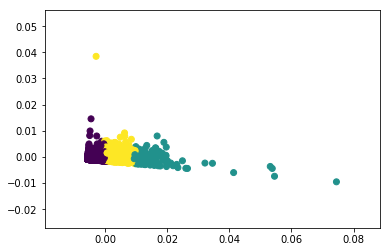

In [4]:
X_norm = normalize(dfstats)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_norm)
model1 = KMeans(n_clusters=3).fit(X_norm)
cluster_assignment_kmeans = model1.predict(X_norm)
plt.scatter(X_pca[:,0], X_pca[:,1], c = cluster_assignment_kmeans)

In [5]:
print(X_pca[:,1].argmax())

2184


In [6]:
df_no_GP.iloc[2184]

A                                  1
FC                                 1
G                                  0
GP                                 3
GS                                 0
MINS                              25
OFF                                0
R                                  0
SHTS                               0
SOG                                0
Y                                  1
season                          2017
club                             ORL
position                           M
next_year_compensation         68902
name                      tony rocha
current_compensation           65621
Name: 2267, dtype: object

In [7]:
print(X_pca[:,0].argmax())

309


In [8]:
outliers = np.argsort(X_pca[:,0])
outlier_pca = outliers[-5:]
df_no_GP.iloc[outlier_pca]

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,club,position,next_year_compensation,name,current_compensation
1494,0.0,0.0,0.0,2.0,0.0,41.0,0.0,0.0,3.0,2.0,0.0,2014,NYRB,M,50000,marius obekop,41500
219,0.0,1.0,3.0,10.0,0.0,128.0,3.0,0.0,11.0,7.0,1.0,2008,CLB,F,65438,jason garey,60625
938,0.0,1.0,1.0,3.0,0.0,53.0,0.0,0.0,4.0,3.0,0.0,2012,CHI,F,46500,quincy amarikwa,44100
1469,0.0,1.0,0.0,1.0,0.0,16.0,0.0,0.0,1.0,1.0,0.0,2014,LA,M,60000,rafael garcia,48825
318,0.0,0.0,0.0,1.0,0.0,12.0,0.0,0.0,1.0,1.0,0.0,2008,TFC,D-M,20100,gabe gala,12900


In [9]:
kmeanscluster1 = df_no_GP[cluster_assignment_kmeans == 0]
kmeanscluster2 = df_no_GP[cluster_assignment_kmeans == 1]
kmeanscluster3 = df_no_GP[cluster_assignment_kmeans == 2]

In [10]:
kmeanscluster1.describe()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,next_year_compensation,current_compensation
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1.442000e+03,1.442000e+03
mean,1.493759,20.318308,0.755895,20.580444,17.800277,1591.597781,1.022885,0.215673,10.981969,3.100555,2.920943,2012.551318,1.818005e+05,1.722036e+05
std,1.991732,14.528177,1.139803,10.171096,10.748674,944.082569,1.769164,0.477041,10.538042,3.330970,2.473873,3.052479,3.570226e+05,3.842395e+05
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1.770000e+04,1.290000e+04
25%,0.000000,9.000000,0.000000,12.000000,9.000000,809.250000,0.000000,0.000000,3.000000,1.000000,1.000000,2010.000000,7.500000e+04,6.515325e+04
50%,1.000000,18.000000,0.000000,22.000000,18.000000,1620.000000,0.000000,0.000000,8.000000,2.000000,2.000000,2013.000000,1.255625e+05,1.150020e+05
75%,2.000000,29.000000,1.000000,29.000000,27.000000,2398.000000,1.000000,0.000000,16.000000,5.000000,4.000000,2015.000000,1.897972e+05,1.794848e+05
max,19.000000,86.000000,8.000000,66.000000,64.000000,5592.000000,20.000000,3.000000,72.000000,20.000000,15.000000,2017.000000,6.500000e+06,6.500000e+06


In [11]:
kmeanscluster2.describe()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,next_year_compensation,current_compensation
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,1.570000e+02,1.570000e+02
mean,2.910828,21.936306,8.687898,20.528662,15.662420,1424.579618,13.585987,0.095541,53.624204,24.649682,2.248408,2012.649682,8.415450e+05,7.883198e+05
std,3.499773,18.087991,7.163703,11.028844,12.048808,1035.534515,13.377193,0.294902,42.884970,18.292098,2.305668,3.261796,1.465051e+06,1.512997e+06
min,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2007.000000,2.010000e+04,1.290000e+04
25%,0.000000,8.000000,2.000000,10.000000,3.000000,340.000000,3.000000,0.000000,12.000000,7.000000,0.000000,2010.000000,1.000000e+05,8.059000e+04
50%,2.000000,19.000000,7.000000,23.000000,14.000000,1271.000000,10.000000,0.000000,45.000000,22.000000,2.000000,2013.000000,2.090000e+05,1.916670e+05
75%,4.000000,31.000000,14.000000,30.000000,27.000000,2368.000000,20.000000,0.000000,81.000000,39.000000,3.000000,2016.000000,6.750000e+05,6.500000e+05
max,19.000000,70.000000,31.000000,39.000000,37.000000,3292.000000,82.000000,1.000000,214.000000,71.000000,9.000000,2017.000000,7.115556e+06,7.115556e+06


In [12]:
kmeanscluster3.describe()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,next_year_compensation,current_compensation
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,6.730000e+02,6.730000e+02
mean,3.852897,23.222883,4.375929,23.762259,17.970282,1607.857355,7.857355,0.185736,37.429421,15.023774,2.588410,2012.279346,3.277103e+05,2.925092e+05
std,4.106549,14.523102,3.665291,8.991395,10.238190,864.338038,7.641162,0.452807,23.069605,9.209663,2.208274,3.067563,7.301485e+05,6.884107e+05
min,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,1.290000e+04,1.770000e+04
25%,1.000000,12.000000,2.000000,17.000000,10.000000,931.000000,2.000000,0.000000,20.000000,8.000000,1.000000,2010.000000,9.600000e+04,8.280400e+04
50%,3.000000,21.000000,4.000000,25.000000,18.000000,1597.000000,5.000000,0.000000,35.000000,14.000000,2.000000,2013.000000,1.600000e+05,1.388130e+05
75%,5.000000,31.000000,6.000000,30.000000,26.000000,2267.000000,11.000000,0.000000,52.000000,21.000000,4.000000,2015.000000,2.660000e+05,2.400000e+05
max,50.000000,96.000000,30.000000,68.000000,66.000000,5774.000000,47.000000,3.000000,132.000000,64.000000,12.000000,2017.000000,6.500000e+06,6.500000e+06


In [13]:
kmeanscluster1.sort_values('next_year_compensation').tail()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,club,position,next_year_compensation,name,current_compensation
782,19.0,34.0,2.0,30.0,29.0,2574.0,3.0,0.0,36.0,10.0,11.0,2011,LA,M,4000000,david beckham,6500000
802,5.0,26.0,0.0,21.0,21.0,1864.0,0.0,1.0,23.0,5.0,6.0,2011,NY,D,4600000,rafael marquez,4600000
1994,11.0,30.0,1.0,33.0,33.0,2844.0,1.0,0.0,26.0,6.0,4.0,2016,NYCFC,M,5915690,andrea pirlo,5915690
2343,2.0,28.0,0.0,35.0,35.0,3150.0,0.0,0.0,13.0,1.0,10.0,2017,TOR,M,6500000,michael bradley,6500000
2103,5.0,34.0,2.0,30.0,30.0,2760.0,0.0,0.0,14.0,4.0,7.0,2016,TOR,M,6500000,michael bradley,6500000


In [14]:
kmeanscluster2.sort_values('next_year_compensation').tail()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,club,position,next_year_compensation,name,current_compensation
2341,6.0,57.0,17.0,31.0,29.0,2479.0,16.0,1.0,74.0,34.0,9.0,2017,TOR,F,5000000,jozy altidore,4875000
2252,9.0,31.0,24.0,33.0,30.0,2736.0,32.0,0.0,151.0,59.0,4.0,2017,NYCFC,F,5610000,david villa,5610000
1997,4.0,49.0,23.0,35.0,34.0,3037.0,45.0,0.0,170.0,71.0,5.0,2016,NYCFC,F,5610000,david villa,5610000
2105,19.0,42.0,21.0,34.0,34.0,2975.0,32.0,0.0,214.0,71.0,3.0,2016,TOR,F,7115556,sebastian giovinco,7115556
2346,7.0,36.0,17.0,29.0,29.0,2417.0,13.0,0.0,141.0,58.0,6.0,2017,TOR,F,7115556,sebastian giovinco,7115556


In [15]:
kmeanscluster3.sort_values('next_year_compensation').tail()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,club,position,next_year_compensation,name,current_compensation
2206,6.0,28.0,12.0,50.0,50.0,4378.0,14.0,0.0,118.0,34.0,6.0,2017,LA,F,6000000,giovani dos-santos,5500000
1836,6.0,23.0,5.0,26.0,26.0,2340.0,1.0,0.0,58.0,17.0,3.0,2015,TOR,M,6500000,michael bradley,6500000
274,10.0,14.0,5.0,25.0,25.0,2248.0,4.0,0.0,35.0,12.0,6.0,2008,LA,M,6500000,david beckham,6500000
427,4.0,25.0,2.0,15.0,15.0,1297.0,1.0,1.0,25.0,10.0,2.0,2009,LA,M,6500000,david beckham,6500000
602,3.0,7.0,2.0,10.0,8.0,736.0,0.0,0.0,18.0,11.0,4.0,2010,LA,M,6500000,david beckham,6500000


In [16]:
kmeanscluster1.position.value_counts()

D      716
M      542
F       77
D-M     56
M-D     28
M-F     10
F-M      7
M/D      2
D/M      2
M/F      2
Name: position, dtype: int64

In [17]:
kmeanscluster2.position.value_counts()

F      125
M       25
F-M      3
M-F      2
M/F      1
D-M      1
Name: position, dtype: int64

In [18]:
kmeanscluster3.position.value_counts()

F      310
M      246
M-F     52
F-M     23
D       21
M-D      6
M/F      4
F/M      4
D-M      4
D/F      3
Name: position, dtype: int64

In [19]:
df_no_GP.position.value_counts()

M      813
D      737
F      512
M-F     64
D-M     61
M-D     34
F-M     33
M/F      7
F/M      4
D/F      3
M/D      2
D/M      2
Name: position, dtype: int64